# indexing in Pandas


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Method" data-toc-modified-id="Method-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Method</a></span><ul class="toc-item"><li><span><a href="#[Option-1]-Pandas-Query" data-toc-modified-id="[Option-1]-Pandas-Query-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>[Option 1] Pandas Query</a></span></li><li><span><a href="#[Option-2]-Pandas-Logical-operators" data-toc-modified-id="[Option-2]-Pandas-Logical-operators-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>[Option 2] Pandas Logical operators</a></span></li><li><span><a href="#[Option-3]-Numpy-or-Bitwise-logical-function" data-toc-modified-id="[Option-3]-Numpy-or-Bitwise-logical-function-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>[Option 3] Numpy or Bitwise logical function</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Why?" data-toc-modified-id="Why?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Why?</a></span></li><li><span><a href="#Avoiding-Parentheses-Grouping" data-toc-modified-id="Avoiding-Parentheses-Grouping-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Avoiding Parentheses Grouping</a></span></li><li><span><a href="#Differences-between-logical-and-bitwise-operations-(on-non-booleans)" data-toc-modified-id="Differences-between-logical-and-bitwise-operations-(on-non-booleans)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Differences between logical and bitwise operations (on non-booleans)</a></span><ul class="toc-item"><li><span><a href="#Logical-&amp;-Bitwise-operators-for-Booleans" data-toc-modified-id="Logical-&amp;-Bitwise-operators-for-Booleans-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Logical &amp; Bitwise operators for Booleans</a></span></li></ul></li></ul></li><li><span><a href="#reference" data-toc-modified-id="reference-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>reference</a></span></li></ul></div>

## Introduction 




In [45]:
import numpy as np 
import pandas as pd

from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [46]:
import pandas as pd
# print(pd.__version__)    # 실습할 판다스 버전: 1.0.1
data = {"age": [10, 10, 21, 22],
        "weight": [20, 30, 60, 70],
       "height":[150,160,170,180]}
df = pd.DataFrame(data)
display(df)

,age,weight,height
0,10,20,150
1,10,30,160
2,21,60,170
3,22,70,180


## Method



### [Option 1] Pandas Query 

Query 사용 시 장단점
- 장점은 가독성과 편의성이 최대 장점입니다.
- 단점은 .loc[ ] 로 구현한 것보다 속도가 느립니다.


Query 함수는 아래 6가지 기능을 포함하고 있습니다.

1. 비교 연산자( ==, >, >=, <, <=, != )
2. in 연산자( in, ==, not in, != )
3. 논리 연산자(and, or, not)
4. 외부 변수(또는 함수) 참조 연산
5. 인덱스 검색
6. 문자열 부분검색( str.contains, str.startswith, str.endswith )

In [48]:
str_expr = "age == 10"    # 나이가 10 이다 (비교연산자 ==)
df_q = df.query(str_expr) # 조건 부합 데이터 추출
display_side_by_side(df, df_q)

,age,weight,height
0,10,20,150
1,10,30,160
2,21,60,170
3,22,70,180
,age,weight,height
0,10,20,150
1,10,30,160


In [49]:
str_expr = "(age == 10) and (weight >= 30)" # 나이가 10이고 몸무게가 30kg 이상이다 (소문자 논리연산 and)
df_q = df.query(str_expr)                   # 조건 부합 데이터 추출
display_side_by_side(df, df_q)

,age,weight,height
0,10,20,150
1,10,30,160
2,21,60,170
3,22,70,180
,age,weight,height
1,10,30,160


### [Option 2] Pandas Logical operators

좀 더 빠른 조건색인이 가능 

In [53]:
%%timeit -n 1_000
df[df['age']==10]

255 µs ± 1.66 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [54]:
%%timeit -n 1_000
str_expr = "age == 10"    # 나이가 10 이다 (비교연산자 ==)
df_q = df.query(str_expr) # 조건 부합 데이터 추출

1.18 ms ± 3.42 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [52]:
%%timeit -n 1_000
df[(df['age']==10) & (df['weight']>=30)]

443 µs ± 8.26 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [50]:
%%timeit -n 1_000
str_expr = "(age == 10) and (weight >= 30)" # 나이가 10이고 몸무게가 30kg 이상이다 (소문자 논리연산 and)
df_q = df.query(str_expr)                   # 조건 부합 데이터 추출

1.38 ms ± 10.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### [Option 3] Numpy or Bitwise logical function

당연히 비트 연산이 더 빠르다...


```python
>>> import numpy as np
>>> a1 = np.array([0, 0, 1, 1])
>>> a2 = np.array([0, 1, 0, 1])

>>> np.logical_and(a1, a2)
array([False, False, False,  True])
>>> np.bitwise_and(a1, a2)
array([0, 0, 0, 1], dtype=int32)
```


In [19]:
%%timeit -n 1_000
df[np.logical_or(df['age']==10 ,df['weight']>=30)]

562 µs ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [29]:
%%timeit -n 1_000
df[ np.bitwise_or(df['age']==10 , df['weight']>=30)]

488 µs ± 9.46 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [75]:
%%timeit -n 1_000
df[np.logical_and.reduce([df['age']==10 ,df['weight']>=30, df['weight']<50])]# For multiple masks, use logical_or.reduce: 

544 µs ± 10.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Summary 

```
Logical operator | NumPy logical function | NumPy bitwise function | Bitwise operator
-------------------------------------------------------------------------------------
       and       |  np.logical_and        | np.bitwise_and         |        &
-------------------------------------------------------------------------------------
       or        |  np.logical_or         | np.bitwise_or          |        |
-------------------------------------------------------------------------------------
                 |  np.logical_xor        | np.bitwise_xor         |        ^
-------------------------------------------------------------------------------------
       not       |  np.logical_not        | np.invert              |        ~
```
       

### Why? 


If you do not use parentheses, the expression is evaluated incorrectly. 


> df['A'] < 5 & df['B'] > 5

> df['A'] < (5 & df['B']) > 5

python operator 순서에 의해서 논리연산자가 부등식보다 먼저 계산되게 된다. 이것을 피하기 위해 괄호(Parentheses)를 쳐야된다. 


https://docs.python.org/3/reference/expressions.html#comparisons

### Avoiding Parentheses Grouping
The fix is actually quite simple. Most operators have a corresponding bound method for DataFrames. If the individual masks are built up using functions instead of conditional operators, you will no longer need to group by parens to specify evaluation order:


```
╒════╤════════════╤════════════╕
│    │ Operator   │ Function   │
╞════╪════════════╪════════════╡
│  0 │ >          │ gt         │
├────┼────────────┼────────────┤
│  1 │ >=         │ ge         │
├────┼────────────┼────────────┤
│  2 │ <          │ lt         │
├────┼────────────┼────────────┤
│  3 │ <=         │ le         │
├────┼────────────┼────────────┤
│  4 │ ==         │ eq         │
├────┼────────────┼────────────┤
│  5 │ !=         │ ne         │
╘════╧════════════╧════════════╛
```

In [76]:
%%timeit -n 1_000
df[df['age'].eq(10) & df['weight'].ge(30)]

447 µs ± 7.37 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [77]:
%%timeit -n 1_000
df[(df['age']==10) & (df['weight']>=30)]

442 µs ± 1.59 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Differences between logical and bitwise operations (on non-booleans)

왜 Bitwise operator 밖에 쓸수 없는 걸까? 

It is really important to stress that bit and logical operations are only equivalent for Boolean NumPy arrays (and boolean Series & DataFrames). If these don't contain Booleans then the operations will give different results. I'll include examples using NumPy arrays, but the results will be similar for the pandas data structures:


#### Logical & Bitwise operators for Booleans


Python's and, or and not logical operators are designed to work with scalars. So Pandas had to do one better and override the bitwise operators to achieve vectorized (element-wise) version of this functionality.

So the following in python (exp1 and exp2 are expressions which evaluate to a boolean result)...

- Logical operators
```
exp1 and exp2              # Logical AND
exp1 or exp2               # Logical OR
not exp1                   # Logical NOT
```

- Bitwise operators
```
exp1 & exp2                # Element-wise logical AND
exp1 | exp2                # Element-wise logical OR
~exp1                      # Element-wise logical NOT
```

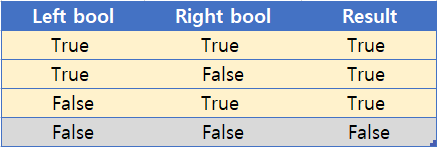

- https://docs.python.org/3/library/stdtypes.html#boolean-operations-and-or-not
- https://stackoverflow.com/questions/21415661/logical-operators-for-boolean-indexing-in-pandas


In [78]:
r = True or True   #// True
print(r)
r = True or False  #// True
print(r)
r = False or True  #// True
print(r)
r = False or False #// False
print(r)

True
True
True
False


In [79]:
r = True | True   #// True
print(r)
r = True | False  #// True
print(r)
r = False | True  #// True
print(r)
r = False | False #// False
print(r)

True
True
True
False


for pandas.

If in the process of performing logical operation you get a ValueError, then you need to use parentheses for grouping:

> (exp1) or (exp2)  ---> error!! 

> (df['col1'] == x) | (df['col2'] == y) 

이유는: NumPy 배열과 Pandas.Series와 객체에 논리값이 없기 때문이다.

In [80]:
display((df['age']==10))
display((df['weight']>=30))

0     True
1     True
2    False
3    False
Name: age, dtype: bool

0    False
1     True
2     True
3     True
Name: weight, dtype: bool

In [81]:
df[(df['age']==10) and (df['weight']>=30)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [82]:
import numpy as np
import pandas as pd

arr1 = np.array([True,True,False,False])
arr2 = pd.array([False,True,True,True])


In [83]:
bool(arr)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## reference 
https://m.blog.naver.com/wideeyed/221867273249

https://ponyozzang.tistory.com/608


https://m.blog.naver.com/wideeyed/221867273249
